In [1]:
library(ggplot2)
library(knitr)

### Exercise 1: Bayesian Inference for Poisson model

The number of particles emitted by a radioactive source during a fixed interval of time  
($\Delta t = 10\ s$) follows a Poisson distribution on the parameter $\mu$. The number of particles  
observed during consecutive time intervals is: 4, 1, 3, 1, 5 and 3.

a) assuming a positive uniform priori distributiuon for the parameter $\mu$

- determine and draw the posterior distribution for $\mu$, given the data

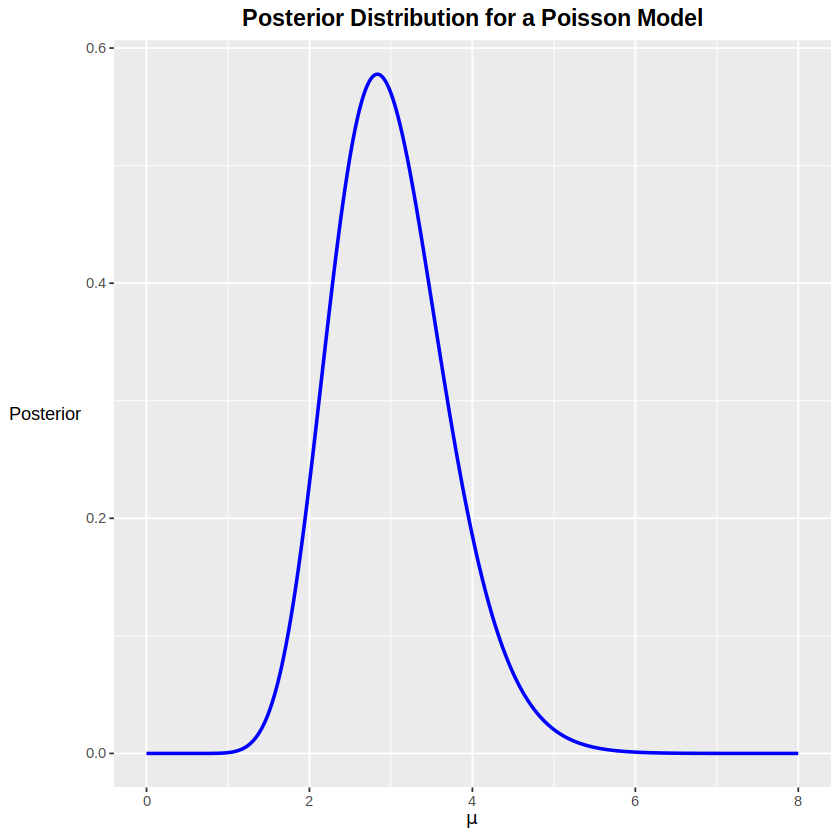

In [2]:
#for a poisson model and a prior uniform distribution, the posterior is a gamma distribution.
#having this info we can calculate alpha and beta for the gamma distribution.

data = c(4,1,3,1,5,3)
alpha_a = sum(data) + 1
beta_a = length(data)

mu = seq(0,8,length=100000)
post_values = dgamma(x=mu, shape=alpha_a, rate=beta_a)
post_norm_values = post_values / sum(post_values)
post_data = data.frame(mu=mu, post_values=post_values)

ggplot(post_data, aes(x=mu, y=post_values)) + 
    geom_line(color="blue", linewidth=1) + 
    labs(x=expression(mu),
         y="Posterior",
         title="Posterior Distribution for a Poisson Model") + 
    theme(axis.title.y=element_text(angle=0, vjust=0.5),
          plot.title=element_text(hjust=0.5, size=14, face="bold"))

- evaluate mean, median and variance, both analytically and numerically in R

In [3]:
#analitycally i can comput the mean and variance using alpha and beta. i can approximate the median too
cdf_values = cumsum(post_norm_values)

anal_mean_a = alpha_a / beta_a
anal_median = alpha_a^(1/3) * (1 - 1/(9*alpha_a) - 0.2/alpha_a)^3
anal_var_a = alpha_a/(beta_a^2)

num_mean = sum(mu * post_norm_values)
num_median = mu[which(cdf_values >= 0.5)[1]]
num_var = sum((mu - num_mean)^2 * post_norm_values)

results_df = data.frame(
  Type = c("Analytical", "Numerical"),
  Mean = c(anal_mean_a, num_mean),
  Median = c(anal_median, num_median),
  Variance = c(anal_var_a, num_var)
)

kable(results_df, caption="Analytical and Numerical Results")



Table: Analytical and Numerical Results

|Type       |     Mean|   Median|  Variance|
|:----------|--------:|--------:|---------:|
|Analytical | 3.000000| 2.487186| 0.5000000|
|Numerical  | 2.999999| 2.944669| 0.4999937|

b) assuming a Gamma prior such that the expected value is $\mu = 3$ with a standard deviation $\sigma = 1$

- determine and draw the posterior distribution for $\mu$, given the data

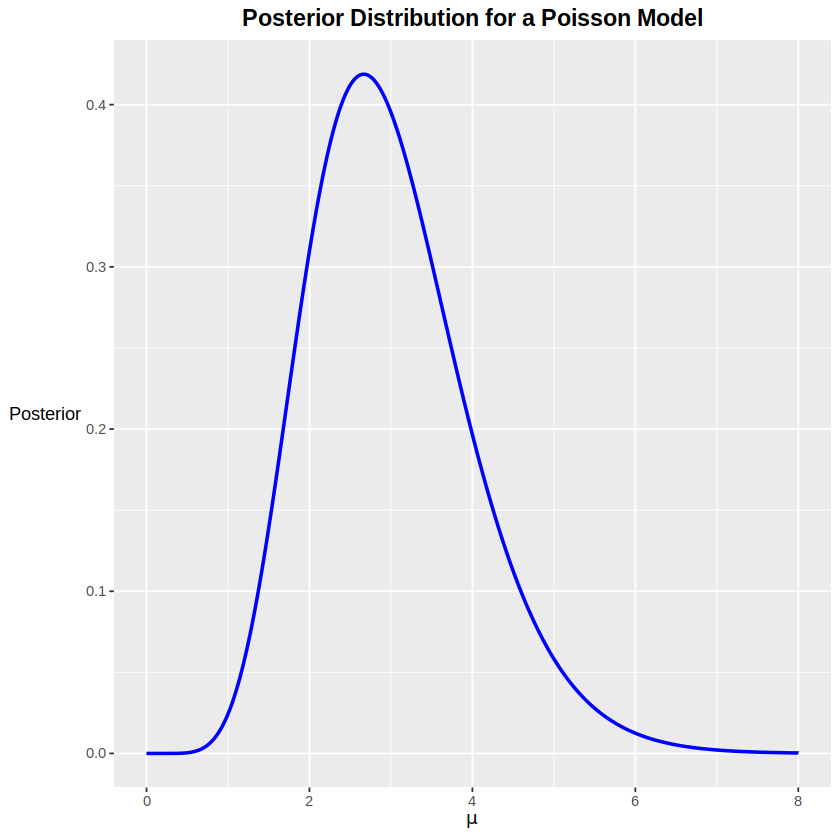

In [4]:
expected_mu = 3
sigma = 1

alpha_b = expected_mu^2 / sigma^2
beta_b = expected_mu / sigma^2

post_values = dgamma(x=mu, shape=alpha_b, rate=beta_b)
post_norm_values = post_values / sum(post_values)
post_data = data.frame(mu=mu, post_values=post_values)

ggplot(post_data, aes(x=mu, y=post_values)) + 
    geom_line(color="blue", linewidth=1) + 
    labs(x=expression(mu),
         y="Posterior",
         title="Posterior Distribution for a Poisson Model") + 
    theme(axis.title.y=element_text(angle=0, vjust=0.5),
          plot.title=element_text(hjust=0.5, size=14, face="bold"))

- evaluate mean, median and variance, both analytically and numerically in R

In [5]:
alpha_post_b = alpha_b + sum(data)
beta_post_b = beta_b + length(data)
cdf_values = cumsum(post_norm_values)

anal_mean_b = alpha_post_b / beta_post_b
anal_median = alpha_post_b^(1/3) * (1 - 1/(9*alpha_post_b) - 0.2/alpha_post_b)^3
anal_var_b = alpha_post_b/(beta_post_b^2)

num_mean = sum(mu * post_norm_values)
num_median = mu[which(cdf_values >= 0.5)[1]]
num_var = sum((mu - num_mean)^2 * post_norm_values)

results_df = data.frame(
  Type = c("Analytical", "Numerical"),
  Mean = c(anal_mean_b, num_mean),
  Median = c(anal_median, num_median),
  Variance = c(anal_var_b, num_var)
)

kable(results_df, caption="Analytical and Numerical Results")



Table: Analytical and Numerical Results

|Type       |     Mean|   Median|  Variance|
|:----------|--------:|--------:|---------:|
|Analytical | 2.888889| 2.857417| 0.3209877|
|Numerical  | 2.999175| 2.889469| 0.9956016|

c) evaluate a 95% credibility interval for the result obtained with different priors. Compare the result with that obtained using a normal approximation for the posterior distribution, with the same mean and standard deviation

In [7]:
#here i want to start from 2.5% and finish at 97.5%
gamma_ci_a = qgamma(c(0.025, 0.975), shape=alpha_a, rate=beta_a)
gamma_ci_b = qgamma(c(0.025, 0.975), shape=alpha_post_b, rate=beta_post_b)

#the interval is calculated as mu +- 1.96*sigma for the normal approximation
normal_ci_a = c(anal_mean_a - 1.96*sqrt(anal_var_a), anal_mean_a + 1.96*sqrt(anal_var_a))
normal_ci_b = c(anal_mean_b - 1.96*sqrt(anal_var_b), anal_mean_b + 1.96*sqrt(anal_var_b))

comparison = data.frame(
  Prior = c("Uniform (Part a)", "Gamma (Part b)"),
  Mean = c(anal_mean_a, anal_mean_b),
  Variance = c(anal_var_a, anal_var_b),
  `Gamma CI` = I(list(gamma_ci_a, gamma_ci_b)),
  `Normal CI` = I(list(normal_ci_a, normal_ci_b))
)

kable(comparison, caption="Results comparison for the 2 different priors")



Table: Results comparison for the 2 different priors

|Prior            |     Mean|  Variance|Gamma.CI     |Normal.CI    |
|:----------------|--------:|---------:|:------------|:------------|
|Uniform (Part a) | 3.000000| 0.5000000|1.777990.... |1.614070.... |
|Gamma (Part b)   | 2.888889| 0.3209877|1.887118.... |1.778435.... |

### Exercise 2: Efficiency using Bayesian approach 

A researcher A wants to evaluate the efficiency of detector 2 (Det2). For this purpose, he sets up the apparatus shown in the figure 1, where Det2 is sandwiched between Det1 and Det3. Let n be the number of signals recorder simultaneously by Det1 and Det3, and r be those also recorder by Det2, researcher A obtains n = 500 and r = 312.
Assuming a binomial model where n is the number of trials and r is the number of success out of n trials,

a) Evaluate the mean and the variance using a Bayesian approach under the hypothesis of:
- uniform prior $\sim$ U(0,1)
- Jeffrey's prior $\sim$ Beta(1/2,1/2)

b) Plot the posterior distributions for both cases

Taking into account that the same detector has been studied by researcher B, who has performed only n = 10 measurements and has obtained r = 10 signals,

c) Evaluate the mean, the variance and the posterior distribution using a uniform prior with the result of researcher B

d) Repeat the computation of points a) and b) with the data of researcher A using as a prior the posterior obtained from point c)

e) [Optional] Compute 95% credible interval using the posterior of the previous point d)